# AutoRec cs3639 Recommendation Systems course IDC

### here will be general explanations

In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
from torch import nn

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## datasets

In this project, we will use 2 datasets:
* **movielens**, which can be downloaded using `utils.datasets_download.py` or straight from [here](http://files.grouplens.org/datasets/movielens/).
* **netflixprize**, which can be downloaded from this [semi-parsed version from kaggle](https://www.kaggle.com/netflix-inc/netflix-prize-data) or from this [raw version](https://archive.org/download/nf_prize_dataset.tar)

**NOTE**: for the notebook to run properly, you should save you dataset under `data` folder and `movielens` folder for the movielens dataset and `netflix` folder for the netflixprize dataset.
i.e `data/movielens` folder and `data/netflix` folder respectively.

# Matrix Factorization

In [3]:
from src.mf.model import MatrixFactorization
from src.mf.training import MFTrainer

In [4]:
from src.data_prep import movielens_load
train, test = movielens_load(1)
print(train.shape)
train

(80000, 4)


,user_id,item_id,rating,timestamp
0,0,0,5,874965758
1,0,1,3,876893171
2,0,2,4,878542960
3,0,3,3,876893119
4,0,4,3,889751712
...,...,...,...,...
79995,942,1066,2,875501756
79996,942,1073,4,888640250
79997,942,1187,3,888640250
79998,942,1227,3,888640275


STARTING TRAIN MF with k: 40, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 5.079, val: 3.975
EPOCH 2: Avg losses: train: 3.299, val: 2.542


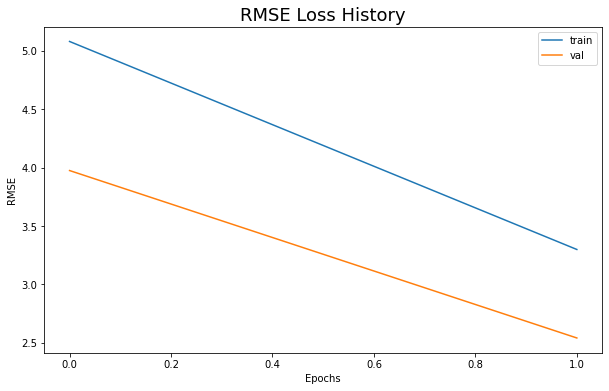

model train time: 2.059

STARTING TRAIN MF with k: 40, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 4.474, val: 3.007
EPOCH 2: Avg losses: train: 2.192, val: 1.472


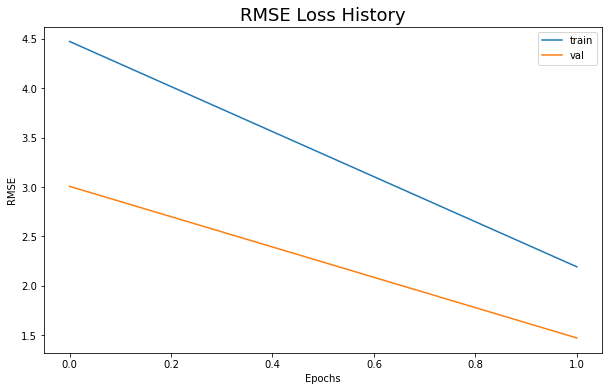

model train time: 2.200

STARTING TRAIN MF with k: 40, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 3.387, val: 1.593
EPOCH 2: Avg losses: train: 1.061, val: 0.758


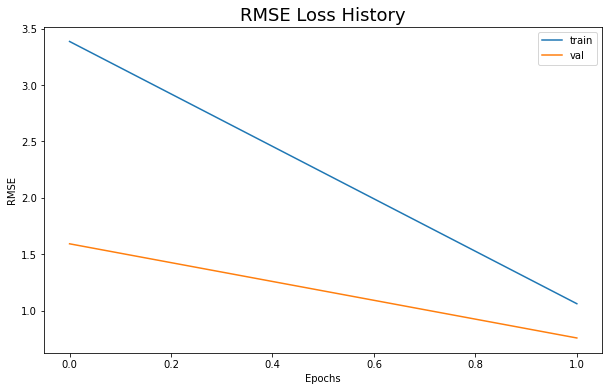

model train time: 2.042

STARTING TRAIN MF with k: 40, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 2.574, val: 0.896
EPOCH 2: Avg losses: train: 0.737, val: 0.697


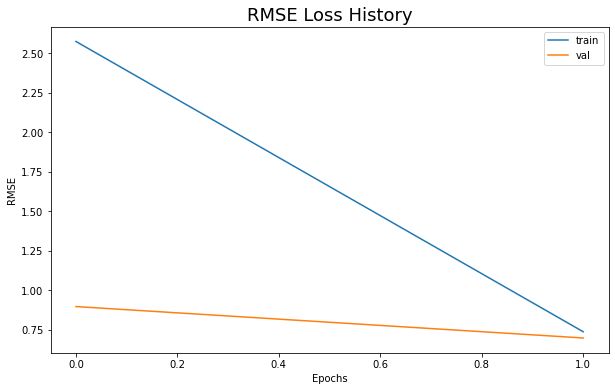

model train time: 2.011

STARTING TRAIN MF with k: 100, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 8.078, val: 6.274
EPOCH 2: Avg losses: train: 5.205, val: 3.998


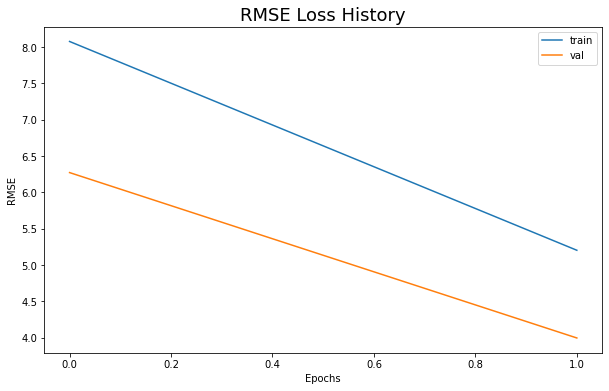

model train time: 2.939

STARTING TRAIN MF with k: 100, lr: 0.001, reg: 0.003


KeyboardInterrupt: 

In [26]:
import json
from time import time
from utils.plots import plot_train_history

epochs = 2
batch_size = 128

for k in [40, 100, 400]:
    for lr in [0.001, 0.003]:
        for reg in [0.001, 0.003]:
            print(f'STARTING TRAIN MF with k: {k}, lr: {lr}, reg: {reg}')
            start_time = time()
            model_dict = {}
            num_users = train.user_id.max() + 1
            num_items = train.item_id.max() + 1

            # Init model and trainer
            model = MatrixFactorization(num_users, num_items, k=k)
            mf_trainer = MFTrainer(train, test, model, epochs=epochs, lr=lr, reg=reg, batch_size=batch_size)

            # Train
            mf_trainer.train_model()

            # Save parmas to model_dict
            model_dict['model_params'] = model.params()
            model_dict.update(mf_trainer.params())
            model_dict['train_losses'] = mf_trainer.train_losses
            model_dict['val_losses'] = mf_trainer.val_losses

            # Save model params to json file
            file_name = f'models_params/MF_{k}_{lr}_{reg}'
            with open(file_name, 'w') as f:
                json.dump(model_dict, f, indent=4)

            plot_train_history(mf_trainer.train_losses, mf_trainer.val_losses)
            print(f'model train time: {time() - start_time:.3f}\n')




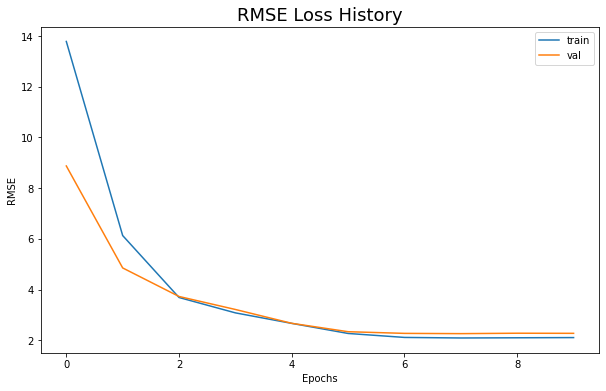

In [28]:

plot_train_history(mf_trainer.train_losses, mf_trainer.val_losses)

# AutoRec

In [3]:
from src.data_prep import movielens_create_ratings
train, test = movielens_create_ratings(1)
train

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5,3,4,3,3,0,4,1,5,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
939,0,0,0,2,0,0,4,5,3,0,...,0,0,0,0,0,0,0,0,0,0
940,5,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from src.autorec.model import AutoRec
from src.autorec.training import AutoRecTrainer

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 0.001


C:\Users\itama\DataspellProjects\AutoRec\src\autorec\training.py:70: RuntimeWarning: Mean of empty slice
  val_avg = np.nanmean(self.val_losses[-1])


EPOCH 1: Avg losses: train: 2.056, val: nan
EPOCH 2: Avg losses: train: 1.144, val: 1.134
EPOCH 3: Avg losses: train: 1.023, val: 1.071
EPOCH 4: Avg losses: train: 0.964, val: 0.937
EPOCH 5: Avg losses: train: 0.936, val: 0.941
EPOCH 6: Avg losses: train: 0.915, val: 0.931
EPOCH 7: Avg losses: train: 0.904, val: 0.929
EPOCH 8: Avg losses: train: 0.885, val: 0.903
EPOCH 9: Avg losses: train: 0.876, val: 0.889
EPOCH 10: Avg losses: train: 0.862, val: 0.817


C:\Users\itama\DataspellProjects\AutoRec\utils\plots.py:13: RuntimeWarning: Mean of empty slice
  val_loss = np.nanmean(val_loss, axis=1)


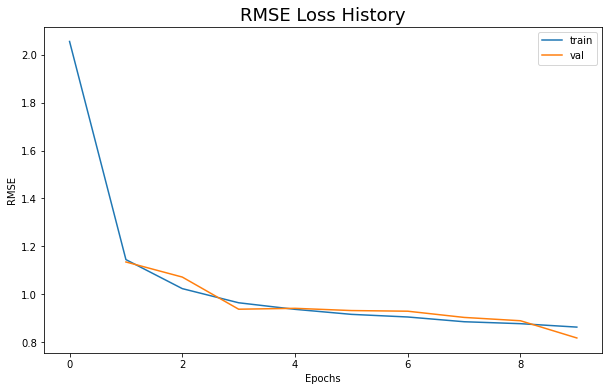

model train time: 1.632

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 2.080, val: nan


C:\Users\itama\DataspellProjects\AutoRec\src\autorec\training.py:70: RuntimeWarning: Mean of empty slice
  val_avg = np.nanmean(self.val_losses[-1])


EPOCH 2: Avg losses: train: 1.136, val: 1.153
EPOCH 3: Avg losses: train: 1.026, val: 1.082
EPOCH 4: Avg losses: train: 0.970, val: 0.946
EPOCH 5: Avg losses: train: 0.950, val: 0.955
EPOCH 6: Avg losses: train: 0.934, val: 0.948
EPOCH 7: Avg losses: train: 0.930, val: 0.955
EPOCH 8: Avg losses: train: 0.919, val: 0.934
EPOCH 9: Avg losses: train: 0.918, val: 0.922
EPOCH 10: Avg losses: train: 0.910, val: 0.838


C:\Users\itama\DataspellProjects\AutoRec\utils\plots.py:13: RuntimeWarning: Mean of empty slice
  val_loss = np.nanmean(val_loss, axis=1)


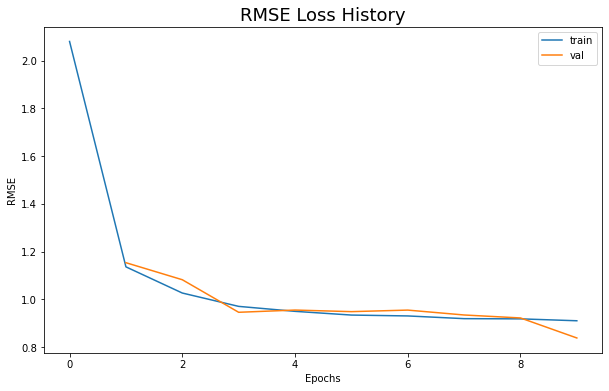

model train time: 1.506

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.631, val: nan


C:\Users\itama\DataspellProjects\AutoRec\src\autorec\training.py:70: RuntimeWarning: Mean of empty slice
  val_avg = np.nanmean(self.val_losses[-1])


EPOCH 2: Avg losses: train: 1.072, val: 1.035
EPOCH 3: Avg losses: train: 0.982, val: 1.069
EPOCH 4: Avg losses: train: 0.942, val: 0.938
EPOCH 5: Avg losses: train: 0.927, val: 0.937
EPOCH 6: Avg losses: train: 0.902, val: 0.923
EPOCH 7: Avg losses: train: 0.889, val: 0.924
EPOCH 8: Avg losses: train: 0.871, val: 0.886
EPOCH 9: Avg losses: train: 0.862, val: 0.872
EPOCH 10: Avg losses: train: 0.853, val: 0.841


C:\Users\itama\DataspellProjects\AutoRec\utils\plots.py:13: RuntimeWarning: Mean of empty slice
  val_loss = np.nanmean(val_loss, axis=1)


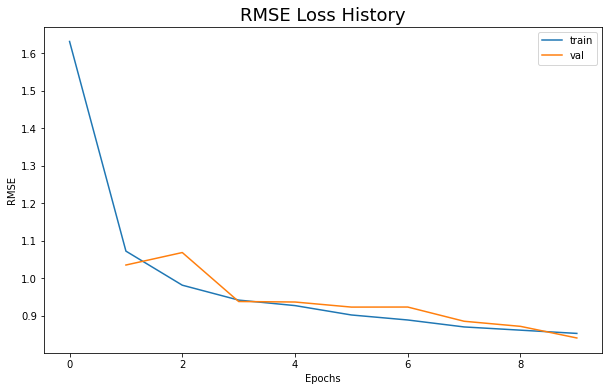

model train time: 1.531

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.628, val: nan


C:\Users\itama\DataspellProjects\AutoRec\src\autorec\training.py:70: RuntimeWarning: Mean of empty slice
  val_avg = np.nanmean(self.val_losses[-1])


EPOCH 2: Avg losses: train: 1.077, val: 1.049
EPOCH 3: Avg losses: train: 0.992, val: 1.090
EPOCH 4: Avg losses: train: 0.963, val: 0.964
EPOCH 5: Avg losses: train: 0.962, val: 0.971
EPOCH 6: Avg losses: train: 0.954, val: 0.967
EPOCH 7: Avg losses: train: 0.952, val: 0.983
EPOCH 8: Avg losses: train: 0.953, val: 0.950
EPOCH 9: Avg losses: train: 0.953, val: 0.928
EPOCH 10: Avg losses: train: 0.951, val: 0.887


C:\Users\itama\DataspellProjects\AutoRec\utils\plots.py:13: RuntimeWarning: Mean of empty slice
  val_loss = np.nanmean(val_loss, axis=1)


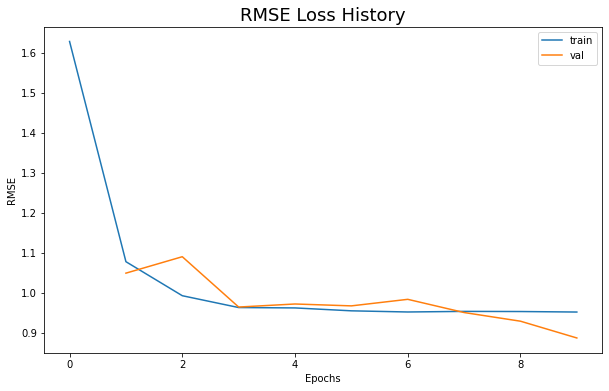

model train time: 1.599

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 2.062, val: nan


C:\Users\itama\DataspellProjects\AutoRec\src\autorec\training.py:70: RuntimeWarning: Mean of empty slice
  val_avg = np.nanmean(self.val_losses[-1])


EPOCH 2: Avg losses: train: 1.143, val: 1.133
EPOCH 3: Avg losses: train: 1.022, val: 1.072
EPOCH 4: Avg losses: train: 0.963, val: 0.937
EPOCH 5: Avg losses: train: 0.936, val: 0.942
EPOCH 6: Avg losses: train: 0.915, val: 0.932
EPOCH 7: Avg losses: train: 0.904, val: 0.927
EPOCH 8: Avg losses: train: 0.884, val: 0.904
EPOCH 9: Avg losses: train: 0.877, val: 0.888
EPOCH 10: Avg losses: train: 0.862, val: 0.817


C:\Users\itama\DataspellProjects\AutoRec\utils\plots.py:13: RuntimeWarning: Mean of empty slice
  val_loss = np.nanmean(val_loss, axis=1)


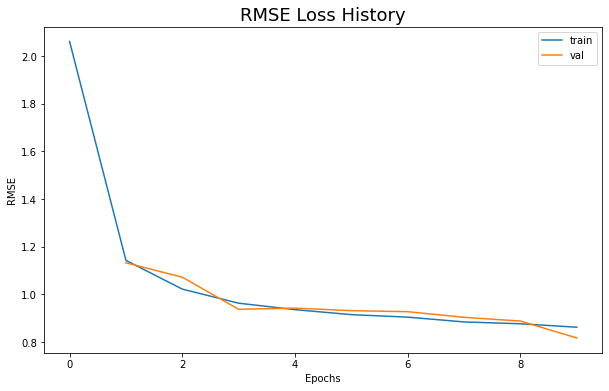

model train time: 1.510

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 2.080, val: nan


C:\Users\itama\DataspellProjects\AutoRec\src\autorec\training.py:70: RuntimeWarning: Mean of empty slice
  val_avg = np.nanmean(self.val_losses[-1])


EPOCH 2: Avg losses: train: 1.136, val: 1.153
EPOCH 3: Avg losses: train: 1.026, val: 1.082
EPOCH 4: Avg losses: train: 0.970, val: 0.946
EPOCH 5: Avg losses: train: 0.950, val: 0.955
EPOCH 6: Avg losses: train: 0.934, val: 0.948
EPOCH 7: Avg losses: train: 0.930, val: 0.955
EPOCH 8: Avg losses: train: 0.919, val: 0.934
EPOCH 9: Avg losses: train: 0.918, val: 0.922
EPOCH 10: Avg losses: train: 0.910, val: 0.838


C:\Users\itama\DataspellProjects\AutoRec\utils\plots.py:13: RuntimeWarning: Mean of empty slice
  val_loss = np.nanmean(val_loss, axis=1)


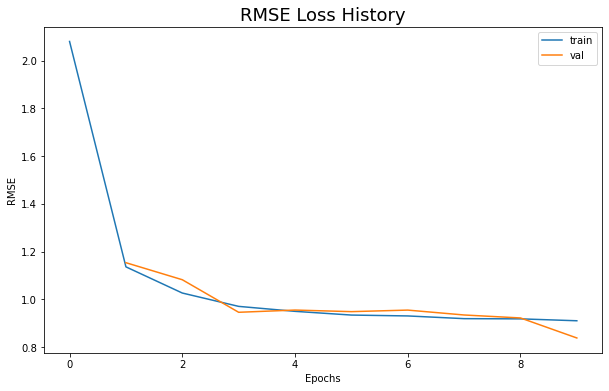

model train time: 1.603

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.631, val: nan


C:\Users\itama\DataspellProjects\AutoRec\src\autorec\training.py:70: RuntimeWarning: Mean of empty slice
  val_avg = np.nanmean(self.val_losses[-1])


EPOCH 2: Avg losses: train: 1.072, val: 1.035
EPOCH 3: Avg losses: train: 0.982, val: 1.069
EPOCH 4: Avg losses: train: 0.942, val: 0.938
EPOCH 5: Avg losses: train: 0.927, val: 0.937
EPOCH 6: Avg losses: train: 0.902, val: 0.923
EPOCH 7: Avg losses: train: 0.889, val: 0.924
EPOCH 8: Avg losses: train: 0.871, val: 0.886
EPOCH 9: Avg losses: train: 0.862, val: 0.872
EPOCH 10: Avg losses: train: 0.853, val: 0.841


C:\Users\itama\DataspellProjects\AutoRec\utils\plots.py:13: RuntimeWarning: Mean of empty slice
  val_loss = np.nanmean(val_loss, axis=1)


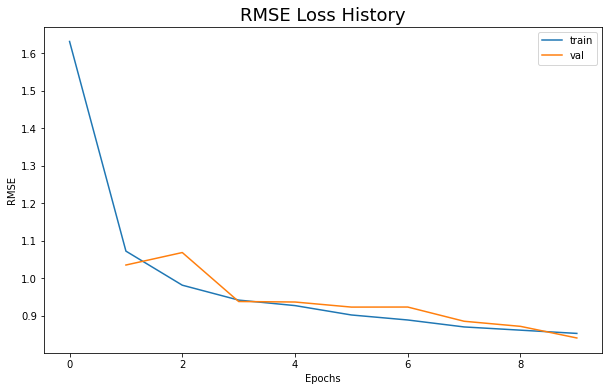

model train time: 1.487

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.628, val: nan


C:\Users\itama\DataspellProjects\AutoRec\src\autorec\training.py:70: RuntimeWarning: Mean of empty slice
  val_avg = np.nanmean(self.val_losses[-1])


EPOCH 2: Avg losses: train: 1.077, val: 1.049
EPOCH 3: Avg losses: train: 0.992, val: 1.090
EPOCH 4: Avg losses: train: 0.963, val: 0.964
EPOCH 5: Avg losses: train: 0.962, val: 0.971
EPOCH 6: Avg losses: train: 0.954, val: 0.967
EPOCH 7: Avg losses: train: 0.952, val: 0.983
EPOCH 8: Avg losses: train: 0.953, val: 0.950
EPOCH 9: Avg losses: train: 0.953, val: 0.928
EPOCH 10: Avg losses: train: 0.951, val: 0.887


C:\Users\itama\DataspellProjects\AutoRec\utils\plots.py:13: RuntimeWarning: Mean of empty slice
  val_loss = np.nanmean(val_loss, axis=1)


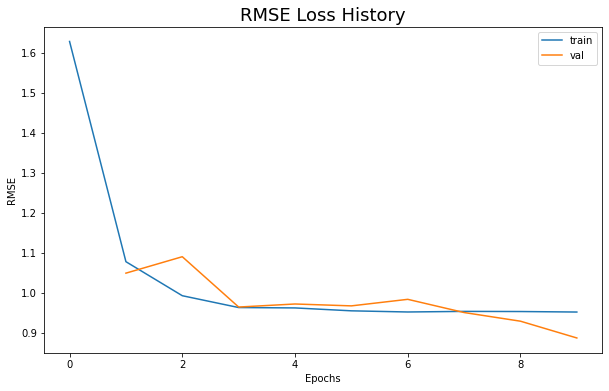

model train time: 1.502



In [6]:
import json
from time import time
from utils.plots import plot_train_history

epochs = 10
batch_size = 128

for num_hidden in [500, 200]:
    for lr in [0.001, 0.003]:
        for reg in [0.001, 0.003]:
            print(f'STARTING TRAIN AutoRec with num_hidden: {num_hidden}, lr: {lr}, reg: {reg}')
            start_time = time()
            model_dict = {}

            num_users, num_items = train.shape

            # Init model and trainer
            model = AutoRec(num_hidden=512, num_features=num_users)
            autorec_trainer = AutoRecTrainer(train, test, model, epochs=epochs, batch_size=batch_size, lr=lr, reg=reg)

            # Train
            autorec_trainer.train_model()

            # Save parmas to model_dict
            model_dict['model_params'] = model.params()
            model_dict.update(autorec_trainer.params())
            model_dict['train_losses'] = autorec_trainer.train_losses
            model_dict['val_losses'] = autorec_trainer.val_losses

            # Save model params to json file
            file_name = f'models_params/AutoRec_{num_hidden}_{lr}_{reg}'
            with open(file_name, 'w') as f:
                json.dump(model_dict, f, indent=4)

            plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)
            print(f'model train time: {time() - start_time:.3f}\n')




In [31]:
num_users, num_items = train.shape
model = AutoRec(num_hidden=512, num_features=num_users)

In [34]:
autorec_trainer = AutoRecTrainer(train, test, model, epochs=60, batch_size=64, lr=0.001, reg=0.001)
autorec_trainer.train_model()

EPOCH 1: Avg losses: train: 0.608, val: 0.776
EPOCH 2: Avg losses: train: 0.585, val: 0.771
EPOCH 3: Avg losses: train: 0.574, val: 0.784
EPOCH 4: Avg losses: train: 0.574, val: 0.765
EPOCH 5: Avg losses: train: 0.573, val: 0.765
EPOCH 6: Avg losses: train: 0.570, val: 0.764
EPOCH 7: Avg losses: train: 0.571, val: 0.759
EPOCH 8: Avg losses: train: 0.568, val: 0.761
EPOCH 9: Avg losses: train: 0.565, val: 0.752
EPOCH 10: Avg losses: train: 0.564, val: 0.761
EPOCH 11: Avg losses: train: 0.564, val: 0.757
EPOCH 12: Avg losses: train: 0.560, val: 0.753
EPOCH 13: Avg losses: train: 0.555, val: 0.752
EPOCH 14: Avg losses: train: 0.558, val: 0.754
EPOCH 15: Avg losses: train: 0.557, val: 0.777
EPOCH 16: Avg losses: train: 0.556, val: 0.749
EPOCH 17: Avg losses: train: 0.553, val: 0.755
EPOCH 18: Avg losses: train: 0.553, val: 0.739
EPOCH 19: Avg losses: train: 0.550, val: 0.745
EPOCH 20: Avg losses: train: 0.549, val: 0.753
EPOCH 21: Avg losses: train: 0.546, val: 0.753
EPOCH 22: Avg losses: 

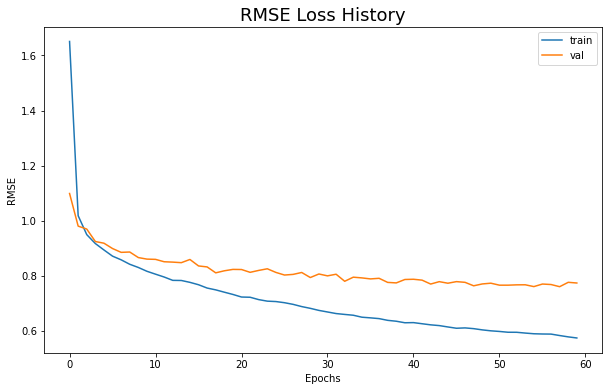

In [33]:
from utils.plots import plot_train_history
plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)